# Лабораторная работа №9

Корзун В. А. Вариант 3; 23.05.2024

# Обход бинарного дерева поиска. Поиск максимального и минимального значений

## Задание 1. Центрированный обход бинарного дерева поиска

<span style='color:red'>Доопределим</span> классы BinaryTree , BinaryNode ,
EmptyNode из Лабораторной работы 8 за счет определения нового метода
lcr(self) , реализующего центрированный обход бинарного дерева поиска.
Рекомендации по выполнению представлены в лекции к теме Бинарное дерево
поиска. Реализация на основе ООП.

Результатом вызова метода lcr для экземпляра класса BinaryTree должен быть
список значений вершин дерева, отсортированных по возрастанию.

- <span style='color:red'>Создадим</span> список source_data из $10^3$ случайных чисел,
равномерно распределенных на отрезке $[0, 100]$. <span style='color:red'>Построим</span> центрированный обход дерева с помощью метода lcr.
- <span style='color:red'>Изобразим</span> график по точкам, ординаты которых заданы списком
source_data. В этой же графической области <span style='color:red'>изобразим</span> график
по точкам, одинаты которых заданы списком, результатом центрированного
обхода бинарного дерева поиска.

In [4]:
class BinaryNode:
    def __init__(self, left, value, right):
        self.left = left
        self.value = value
        self.right = right

    def lcr(self):
        return self.left.lcr() + [self.value] + self.right.lcr()

    def __repr__(self):
        return f'({self.left}, {self.value}, {self.right})'

    def insert(self, value):
        if value < self.value:
            self.left = self.left.insert(value)
        else:
            self.right = self.right.insert(value)
        return self
    
    def __contains__(self, value):
        return (value in self.left) or value == self.value or (value in self.right)
    
    def __len__(self):
        return len(self.left) + len(self.right) + 1

In [5]:
class EmptyNode:
    def __repr__(self):
        return '*'
    
    def lcr(self):
        return []

    def insert(self, value):
        return BinaryNode(self, value, self)

    def __contains__(self, value):
        return False
    
    def __len__(self):
        return 0

In [6]:
class BinaryTree:
    def __init__(self):
        self.root = EmptyNode()

    def lcr(self):
        return self.root.lcr()

    def __repr__(self):
        return repr(self.root)

    def insert(self, value):
        self.root = self.root.insert(value) 
    
    def __contains__(self, value):
        return value in self.root
    
    def __len__(self):
        return len(self.root)

Проверка:

In [2]:
import random as rnd
source_data = list(rnd.uniform(0,100) for _ in range(10**3))
source_data

[53.816698457154835,
 15.088986444559415,
 68.15204176173046,
 26.68567590968417,
 55.851364808448935,
 89.00259161647998,
 30.94558611605095,
 53.641892788946954,
 85.78881279621044,
 40.421685253248526,
 91.09060174807263,
 33.09846634649267,
 27.829168565441577,
 91.21686878924623,
 14.172830918987122,
 40.17627538309109,
 3.5101263918081993,
 35.895097609318604,
 85.39452617458834,
 45.727545728503486,
 85.71312129084818,
 87.42433173257857,
 46.52002890367378,
 56.08175403180883,
 8.197737256355687,
 92.62133671387774,
 42.41114825620384,
 31.40291248082686,
 96.10101304423155,
 20.482813753671824,
 76.87527646702135,
 18.425524976806706,
 43.80331081665943,
 39.64840278962165,
 6.095468999865505,
 66.82692833028861,
 77.27074899271264,
 83.14748563411804,
 26.138547170187763,
 98.55710896116757,
 21.379772981204493,
 59.13487502943548,
 43.625834705195786,
 19.589450234284023,
 5.070196187738063,
 23.241315684143736,
 30.720027497680547,
 3.549088697020386,
 93.59322873273335,
 3

In [15]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)
tree

((((*, 0.08180766499382708, ((((((*, 0.11409505747522752, *), 0.12518413045434773, (*, 0.18157508081497742, (*, 0.3040467652984269, *))), 0.9212904680480083, ((*, 1.190678162375558, *), 1.4060188619041458, *)), 1.4168062149577554, (((*, 1.4752208009392476, *), 1.6168565888426634, ((*, 1.7797350362871778, *), 1.7845153369959732, *)), 1.8560455666408293, (((*, 2.1497883924411543, *), 2.1648435893838913, ((*, 2.2633772259796903, *), 2.2911997519525107, (((*, 2.2985636447581226, *), 2.4211657045486223, (*, 2.4756310773487056, *)), 2.51113116454047, (*, 2.7098077506909846, *)))), 2.927593969655551, (((*, 3.159961347600526, (*, 3.3513537835181406, *)), 3.493960864023704, *), 3.52302443916227, ((*, 3.6997189933181462, (*, 3.7846976279553357, (*, 3.9047088476070413, (*, 4.049595192969191, (*, 4.130849931103375, *))))), 4.48918462172696, ((((*, 4.669589541797958, ((*, 4.742455565212412, *), 4.963331894486833, (*, 5.010277254835637, *))), 5.1046837037287185, *), 5.181381389903761, *), 5.31079650

In [16]:
sorted_data = tree.lcr()

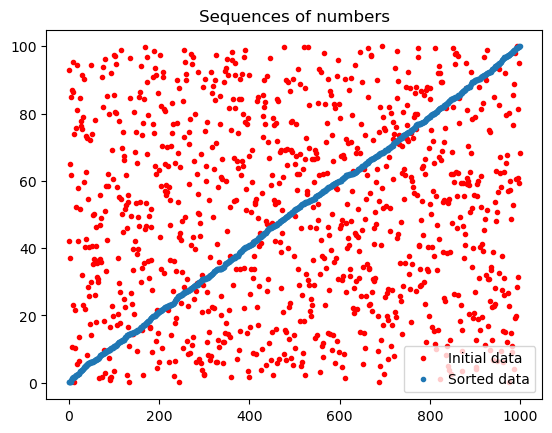

In [17]:
import matplotlib.pyplot as plt
plt.plot(source_data,'r.', label='Initial data')
plt.plot(sorted_data,' .',label='Sorted data')
plt.title('Sequences of numbers')
plt.legend()

## Задание 2. Нахождение минимального и максимального значения

<span style='color:red'>Доопределим</span> классы BinaryTree, BinaryNode,
EmptyNode за счет определения методов min(self) и max(self) для нахождения
минимального и максимального значений в дереве, соответственно. Рекомендации по
выполнению представлены в лекции к теме Бинарное дерево поиска. Реализация на
основе ООП.

<span style='color:red'>Протестируем</span> корректность выполнения методов min и max для дерева tree

In [21]:
class BinaryNode:
    def __init__(self, left, value, right):
        self.left = left
        self.value = value
        self.right = right

    def lcr(self):
        return self.left.lcr() + [self.value] + self.right.lcr()

    def max(self):
        return self.right.max() if isinstance(self.right, BinaryNode) else self.value

    def min(self):
        return self.left.min() if isinstance(self.left, BinaryNode) else self.value

    def __repr__(self):
        return f'({self.left}, {self.value}, {self.right})'

    def insert(self, value):
        if value < self.value:
            self.left = self.left.insert(value)
        else:
            self.right = self.right.insert(value)
        return self
    
    def __contains__(self, value):
        return (value in self.left) or value == self.value or (value in self.right)
    
    def __len__(self):
        return len(self.left) + len(self.right) + 1

In [22]:
class EmptyNode:
    def __repr__(self):
        return '*'
    
    def min(self):
        return None
    
    def max(self):
        return None
    
    def lcr(self):
        return []

    def insert(self, value):
        return BinaryNode(self, value, self)

    def __contains__(self, value):
        return False
    
    def __len__(self):
        return 0

In [23]:
class BinaryTree:
    def __init__(self):
        self.root = EmptyNode()

    def min(self):
        return self.root.min()
    
    def max(self):
        return self.root.max()

    def lcr(self):
        return self.root.lcr()

    def __repr__(self):
        return repr(self.root)

    def insert(self, value):
        self.root = self.root.insert(value) 
    
    def __contains__(self, value):
        return value in self.root
    
    def __len__(self):
        return len(self.root)

Проверка:

In [26]:
tree = BinaryTree()
for i in source_data:
    tree.insert(i)
tree.min(), tree.max()

(0.08180766499382708, 99.93634385496216)

# Задание 3. Создание модуля

<span style='color:red'>Напишем </span>модуль binaryTree.py на основе созданных классов

<span style='color:red'>Напишем </span>строки документации для классов BinaryTree,
BinaryNode, EmptyNode и для каждого метода классов.

<span style='color:red'>Протестируем </span>работу созданного модуля на примерах.

In [3]:
from binaryTree import BinaryTree

tree = BinaryTree()
for i in source_data:
    tree.insert(i)

In [4]:
tree.lcr()

[0.09719227180920997,
 0.15455694102387563,
 0.5822933448840106,
 0.583324554260678,
 0.6990020869334757,
 0.7283498918722597,
 0.8093852937230417,
 0.8849131387050346,
 0.9579818449910515,
 0.9970338497481079,
 1.0357754872798774,
 1.0830765154459354,
 1.105216991989555,
 1.2886182032263993,
 1.3038344824887083,
 1.3519665151815463,
 1.4426619698426069,
 1.4648834856149318,
 1.538482385334794,
 1.5882286815641855,
 1.5922479473789997,
 1.639037806372079,
 1.7325602824238784,
 2.4767049788405493,
 2.5556318560553404,
 2.682155195121061,
 2.7405076503879022,
 2.747560647885028,
 2.7804720053638987,
 2.7992971238577913,
 3.1820505743533567,
 3.4644493881382354,
 3.487730720365201,
 3.5101263918081993,
 3.549088697020386,
 3.5818176491229203,
 3.587156598888641,
 3.637354991084507,
 3.8828705983547374,
 4.143355823185669,
 4.2924515362240285,
 4.314090795662107,
 4.325492810183073,
 4.373029354835545,
 4.493898268591757,
 4.7076957348743065,
 4.873746082735408,
 4.920364926188736,
 4.9453

In [6]:
tree.min(), tree.max()

(0.09719227180920997, 99.99148961586151)

In [8]:
? tree.lcr

Signature:  tree.lcr()
Docstring:
Отсортированный список значений из узлов дерева

Arguments: None

Returns: Остортированный список
File:      c:\users\huawei\documents\python labs\binarytree.py
Type:      method

# Задание 4. Создание пользовательских классов

In [1]:
class MyClass:
    x = 4                               # Создание атрибута класса

    def __init__(self, value = 4):
        self.x = value

    def __add__(self, value):           # Перегрузка оператора +
        return MyClass(self.x + value)
    
    @classmethod                        # Создание классового метода
    def change(cls, value):
        print('class method called')
        cls.x = value
        return cls.x
    
    @staticmethod                       # Создание статического метода
    def draw():
        print("Start drawing")

print(MyClass.x)                        # Доступ к атрибуту
c1 = MyClass()
print(c1.x)                             # Доступ к атрибуту
c1.draw()                               # Доступ к статическому методу
c1 = c1 + 5                             # Доступ к перегруженному методу
print(c1.x)
c2 = MyClass()
c2.change(5)                            # Доступ к классовому методу
print(c2.x, c1.x)

4
4
Start drawing
9
class method called
4 9
